# TP1 Naive Bayes (OBLIGATORY)
**individual work, deadline 29/03/2021 23:59**

In this TP you are going to implement the Naive Bayes (NB) algorithm for categorical (titanic) and continuous (iris) data using **Python 3**.

You are going to fill a few missing functions in the python script nb.py
to implement the exercises that we ask. So first of all read and understand the given python script. To run your code you have to run the
main TP1\_NB.ipynb notebook. Here you have to write
only a short code (it is mentioned where) to run the NB algorithm. Parts of the code are given and it works if the missing functions in nb.py are correctly implemented.

For the categorical data you have to make the necessary modifications in the train_nb() and predict() functions in nb.py in order to work for both continuous and categorical data.




In [1]:
from __future__ import print_function
import random
import numpy as np

import matplotlib.pyplot as plt
# make figures appear inline
%matplotlib inline


# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

###  Import the iris data set

In [2]:
from sklearn import datasets
from sklearn.utils import shuffle

def load_IRIS(test=True):
    iris = datasets.load_iris()
    X, y = shuffle(iris.data, iris.target, random_state= 1230)	
    if test:
        X_train = X[:100, :]
        y_train = y[:100]
        X_test = X[100:, :]
        y_test = y[100:]
        return X_train, y_train, X_test, y_test
    else:
        X = iris.data[:, :] 
        y = iris.target
        return X, y


In [3]:
# Import the iris data set
X_train, y_train, X_test, y_test = load_IRIS(test=True)


In [4]:
# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


Training data shape:  (100, 4)
Training labels shape:  (100,)
Test data shape:  (50, 4)
Test labels shape:  (50,)


In [5]:
y_test

array([0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 2, 2, 0, 1, 1, 2,
       2, 0, 0, 0, 1, 1])

## Fill the missing parts in nb.py


In [58]:
from nb import train_nb, normal_distribution, predict


### Make sure that all the function work

In [7]:
#print(X_train)
#print(normal_distribution(X_train, 0, 1).shape)

In [8]:
prior, mean, std = train_nb(X_train, y_train, True)
print('Prior: ', prior)
print('mean: ', mean)
print('std: ', std)
print('mean shape: ', mean.shape)
print('std shape: ', std.shape)



Prior:  [0.32, 0.41, 0.27]
mean:  [[5.01875    3.475      1.496875   0.25625   ]
 [5.94878049 2.74634146 4.23658537 1.30243902]
 [6.48518519 2.94074074 5.46666667 1.95925926]]
std:  [[0.10902344 0.109375   0.03717773 0.01433594]
 [0.24737656 0.08785247 0.22573468 0.0348721 ]
 [0.43533608 0.11871056 0.28444444 0.06389575]]
mean shape:  (3, 4)
std shape:  (3, 4)


In [9]:
y_pred = predict(X_train, prior, mean, std, True)
print('Predicted label: ', y_pred)

Predicted label:  [0 1 2 2 1 1 0 2 2 1 0 2 1 0 0 2 1 0 1 1 2 0 0 1 1 1 1 0 2 2 0 2 1 2 1 2 2
 0 2 0 1 2 2 1 1 1 0 2 1 2 2 1 2 1 0 0 2 2 2 1 1 1 1 0 2 0 1 1 1 2 1 0 0 0
 2 0 0 1 2 1 1 0 0 0 0 2 2 1 2 0 0 1 0 2 1 1 1 0 0 0]


### Train your model and compute train and test accuracy

In [10]:

prior, mean, std = train_nb(X_train, y_train, True)


In [11]:
#compute the train accuracy:
y_train_pred = predict(X_train, prior, mean, std, True)
num_correct_train = np.count_nonzero(y_train_pred == y_train)
accuracy_train = num_correct_train/len(y_train)*100
print('Train: Got %d / %d correct => accuracy: %f' % (num_correct_train, len(y_train), accuracy_train))


Train: Got 94 / 100 correct => accuracy: 94.000000


In [12]:
#compute the test accuracy:
y_test_pred = predict(X_test, prior, mean, std, True)
num_correct_test = np.count_nonzero(y_test_pred == y_test)
accuracy_test = num_correct_test/len(y_test)*100
print('Test: Got %d / %d correct => accuracy: %f' % (num_correct_test, len(y_test), accuracy_test))


Test: Got 47 / 50 correct => accuracy: 94.000000


## Comment your results

## Visualization
## Decision surface
Visualize, study, and **discuss the decision surfaces that NB algorithm produces for the iris data set**.


* To do so, you will work only in two attributes(training and testing).

     * Testing will be done on an artificially generated dataset that covers in a regular manner all possible values for the two chosen attributes. To do so we need to divide the space into a grid by discretizing the space  into $n$ values between the minimum and maximum value of an attribute. Each of these values must be compared with the $n$ discrete values of the second attribute. The resulting array will be of shape ($n$ * $n$, 2)
     
     * Using your training set classify your test instances and visualize the results of the classification

In [41]:
# Load the Iris data.
# Cleaning up variables to prevent loading data multiple times (which may cause memory issues)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train = load_IRIS(test=False)

# As a sanity check, we print out the size of the training and test data.
# we use all the data as training
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)

Training data shape:  (150, 4)
Training labels shape:  (150,)


In [53]:
axes_labels = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

# For our visualisation we will only keep the two first attributs.
# You can choose 2 attribus here
attribut_1 = 1
attribut_2 = 3

X_train_2_features = np.array([X_train[:,attribut_1], X_train[:,attribut_2]]).T
axes_label_1 = axes_labels[attribut_1]
axes_label_2 = axes_labels[attribut_2]


# and the test set will be the matrix (n*n, 2) where n is the number of values taken between
# the min and the max of each attribute
n = 150
X_test = np.zeros((n*n, 2))
tmp = np.linspace(np.min(X_train_2_features[:, 0])-0.1, np.max(X_train_2_features[:, 0])+0.1, n)
X_test[:,0] = np.repeat(tmp, n)

tmp = np.linspace(np.min(X_train_2_features[:, 1])-0.1, np.max(X_train_2_features[:, 1])+0.1, n)
X_test[:,1] = np.tile(tmp, n)

y_min1 = np.min(X_train_2_features[:, 1])-0.1
y_max1 = np.max(X_train_2_features[:, 1])+0.1
x_min1 = np.min(X_train_2_features[:, 0])-0.1
x_max1 = np.max(X_train_2_features[:, 0])+0.1

print('Training data shape: ', X_train_2_features.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (150, 2)
Testing data shape:  (22500, 2)


In [54]:
# train

from nb import train_nb, normal_distribution, predict


prior, mean, std = train_nb(X_train_2_features, y_train, True)

# test
y_test_pred = predict(X_test, prior, mean, std, True)

print('Predicted data shape : ', y_test_pred.shape)

Predicted data shape :  (22500,)


<Figure size 1440x1152 with 0 Axes>

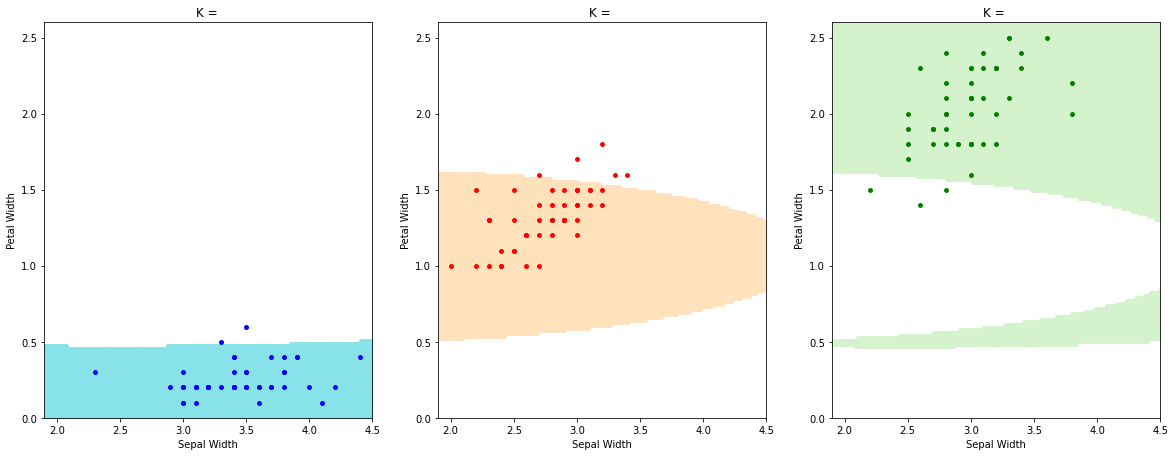

In [55]:
# plot the decision surface
colors_surfaces = ['#88E2EA', '#FFE1BB', '#D4F3CD']
colors_points = ['blue', 'red', 'green']

plt.rcParams['figure.figsize'] = (20.0, 16.0)
plt.clf()
fig = plt.figure() 


for n_class in range(3):
    x_train_attri_1 = X_train_2_features[y_train == n_class, 0]
    x_train_attri_2 = X_train_2_features[y_train == n_class, 1]
        
    x_test_attri_1 = X_test[y_test_pred == n_class, 0]
    x_test_attri_2 = X_test[y_test_pred == n_class, 1]
        
    ax = fig.add_subplot(2,3,1+n_class)  
    ax.set_title("K = ")
    ax.scatter(x_test_attri_1, x_test_attri_2, s=15, color=colors_surfaces[n_class])
    ax.scatter(x_train_attri_1, x_train_attri_2, s=15, color=colors_points[n_class])
    ax.set_xlabel(axes_label_1)
    ax.set_ylabel(axes_label_2)
    ax.set_xlim((x_min1,x_max1))
    ax.set_ylim((y_min1,y_max1))

        
# each color represent a class of the problem

# don't take care of the warning



# NB for catedorical data

In [59]:
import numpy as np
import csv

### Import titanic dataset

In [60]:
with open('titanic.csv', newline='') as csvfile:
        data = list(csv.reader(csvfile))
 
#We suppose that the first line is an indication on the meaning of each
#attribute so we can remove it.
del data[0]
 
#Randomizing the data (we use numpy)
data = np.array(data)
np.random.shuffle(data)
data.tolist()
 
#Splitting the set (2/3 for the training set / 1/3 for the test set)
split_value = int(len(data) / 3)
X_data = data[:,0:3]
y_data = data[:,3]

In [61]:
# As a sanity check, we print out the size of the data and the first line.

print('Data shape:', data.shape)
print('X_data shape:', X_data.shape)
print('y_data shape:', y_data.shape)
print('Data 1st line:', data[0])
print('X_data 1st line:', X_data[0])
print('y_data 1st line:', y_data[0])

Data shape: (2201, 4)
X_data shape: (2201, 3)
y_data shape: (2201,)
Data 1st line: ['second' 'enf' 'f' 'surv']
X_data 1st line: ['second' 'enf' 'f']
y_data 1st line: surv


In [62]:
X_train = X_data[:2*split_value]
y_train = y_data[:2*split_value]

X_test = X_data[2*split_value:]
y_test = y_data[2*split_value:]

In [63]:
# As a sanity check, we print out the size of the training and test data and the first line.

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


print('X_train 1st line:', X_train[0])
print('y_train 1st line:', y_train[0])


X_train shape: (1466, 3)
y_train shape: (1466,)
X_test shape: (735, 3)
y_test shape: (735,)
X_train 1st line: ['second' 'enf' 'f']
y_train 1st line: surv


### NB for categorical data

- Implement the NB algorithm for categorical data. **Make the necessary modifications in train_nb() and predict() functions in order to work for both continuous and categorical data**.
 
- Compute the classification accuracy of the titanic data set (test data) and comment

In [69]:
# dont forget to import your functions
from nb import train_nb, normal_distribution, predict

In [70]:
prior, proba = train_nb(X_train, y_train, False)

In [71]:
#compute the train accuracy:
y_train_pred = predict(X_train, prior, proba, [], False)
num_correct_train = np.count_nonzero(y_train_pred == y_train)
accuracy_train = num_correct_train/len(y_train)*100
print('Train: Got %d / %d correct => accuracy: %f' % (num_correct_train, len(y_train), accuracy_train))

Train: Got 1151 / 1466 correct => accuracy: 78.512960


In [73]:
#compute the test accuracy:
y_test_pred = predict(X_test, prior, proba, [], False)
num_correct_test = np.count_nonzero(y_test_pred == y_test)
accuracy_test = num_correct_test/len(y_test)*100
print('Test: Got %d / %d correct => accuracy: %f' % (num_correct_test, len(y_test), accuracy_test))

Test: Got 582 / 735 correct => accuracy: 79.183673
